# Sentiment Analysis

## Introduction

**Using TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
**Using Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

## Sentiment of Tweet

In [32]:
# We'll start by reading in the tweets, which preserves word order, important for sentiment analysis
import pandas as pd

data = pd.read_pickle('tweet.pkl')
data

,tweet,player,timestamp
0,to affect the quality of the day that is the h...,Havoc,1/17/17
1,a man is what he thinks about all day long,Kootz,1/17/17
2,if you want a thing done well do it yourself,Monroe,1/17/17
3,the backbone of surprise is fusing speed with ...,Calaca,1/17/17
4,each day is the scholar of yesterday,Ginger,5/23/17
...,...,...,...
346,when one burns ones bridges what a very nice f...,Chaos,6/18/19
347,imagination and fiction make up more than thre...,FridaFrida,6/18/19
348,the pen is the tongue of the mind,FridaFrida,6/19/19
349,we have i fear confused power with greatness,FridaFrida,6/19/19


In [34]:
# Use functions to find the polarity and subjectivity of each tweet
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
#!pip install textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['tweet'].apply(pol)
data['subjectivity'] = data['tweet'].apply(sub)
data.to_csv('tweet_polarity.csv')
data

,tweet,player,timestamp,polarity,subjectivity
0,to affect the quality of the day that is the h...,Havoc,1/17/17,0.00,0.0
1,a man is what he thinks about all day long,Kootz,1/17/17,-0.05,0.4
2,if you want a thing done well do it yourself,Monroe,1/17/17,0.00,0.0
3,the backbone of surprise is fusing speed with ...,Calaca,1/17/17,0.00,0.0
4,each day is the scholar of yesterday,Ginger,5/23/17,0.00,0.0
...,...,...,...,...,...
346,when one burns ones bridges what a very nice f...,Chaos,6/18/19,0.78,1.0
347,imagination and fiction make up more than thre...,FridaFrida,6/18/19,0.35,0.4
348,the pen is the tongue of the mind,FridaFrida,6/19/19,0.00,0.0
349,we have i fear confused power with greatness,FridaFrida,6/19/19,-0.40,0.7


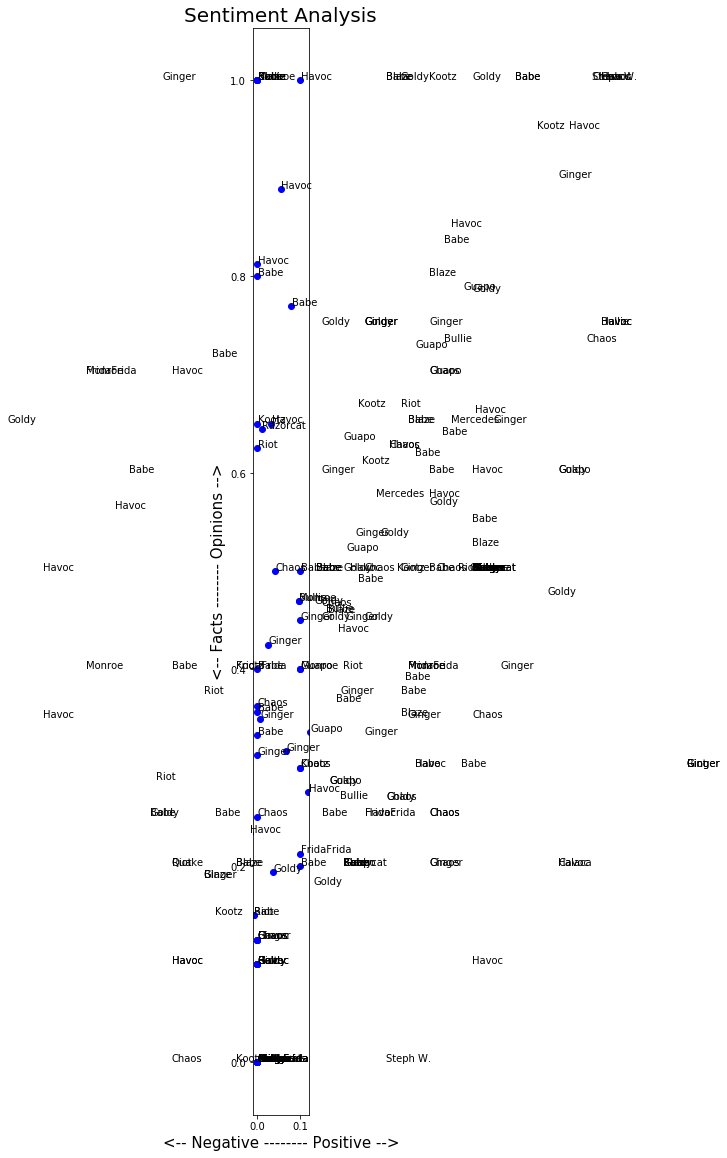

In [42]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [1, 20]

for index, player in enumerate(data.index):
    x = data.polarity.loc[player]
    y = data.subjectivity.loc[player]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['player'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()